#1.미니프로젝트 B1

##2.미리 준비할것

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog

##3.얼굴 이미지 특징 데이터 구하기

In [2]:
url = 'https://github.com/dknife/ML/raw/main/data/Proj2/faces/'

face_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    face_images.append(img)

In [3]:
def plot_images(nRow, nCol, img):
    fig =  plt.figure()
    fig, ax= plt.subplots(nRow, nCol, figsize = (nCol, nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:   axis=ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

<Figure size 640x480 with 0 Axes>

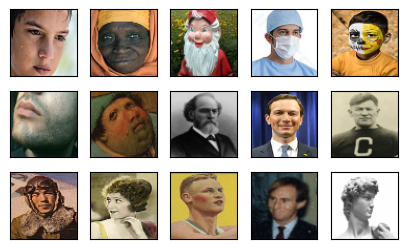

In [4]:
plot_images(3,5, face_images)

##4.얼굴 이미지 특징 데이터 구하기

In [5]:
face_hogs = []
face_features = []

for i in range(15):
    hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
    face_hogs.append(hog_image)
    face_features.append(hog_desc)

<ipython-input-5-4c335261f5a1>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)


<Figure size 640x480 with 0 Axes>

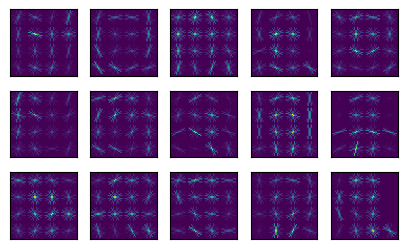

In [6]:
plot_images(3,5, face_hogs)

In [7]:
len(face_features), face_features[0].shape

(15, (128,))

<Figure size 640x480 with 0 Axes>

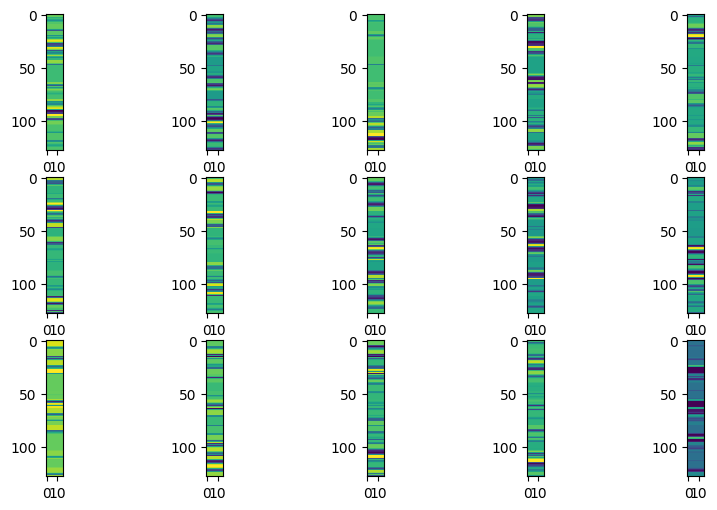

In [8]:
fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize=(10,6))
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(resize(face_features[i*5+j], (128, 16)))

##5.사람얼굴이 아닌 이미지의 특징 벡터 준비

<Figure size 640x480 with 0 Axes>

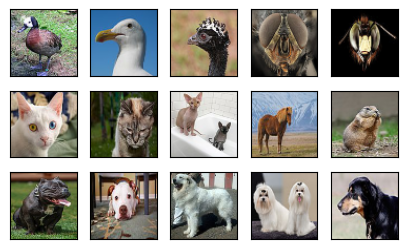

In [9]:
url ='https://github.com/dknife/ML/raw/main/data/Proj2/animals/'
animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64 ,64))
    animal_images.append(img)

plot_images(3,5, animal_images)

<ipython-input-10-ce9a2217d009>:5: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(animal_images[i], orientations=8,


<Figure size 640x480 with 0 Axes>

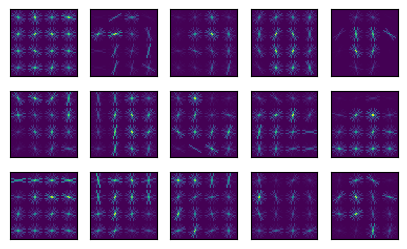

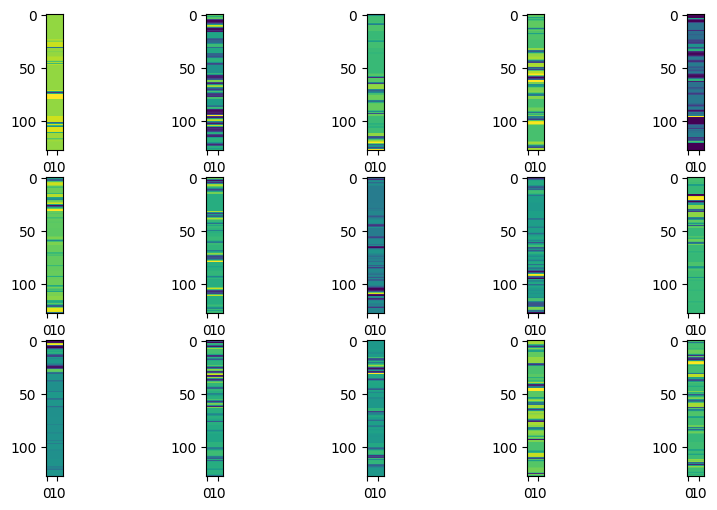

In [10]:
animal_hogs =[]
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, 
                              pixels_per_cell=(16,16), cells_per_block=(1,1),
                              visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)
plot_images(3,5, animal_hogs)


fig, ax = plt.subplots(3,5, figsize = (10, 6))
for i in range(3):
    for j in range(5):
        ax[i,j].imshow(resize(animal_features[i*5+j], (128,16)))

##6.학습을 위한 데이터만들어 학습하기

In [11]:
X, y = [],[]

for feature in face_features:
    X.append(feature)
    y.append(1)

for feature in animal_features:
    X.append(feature)
    y.append(0)
    
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel='poly', degree=5, coef0=10.0))
])

polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [13]:
yhat =polynomial_svm_clf.predict(X)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

##7.새로운 데이터에 적용해 보기

<Figure size 640x480 with 0 Axes>

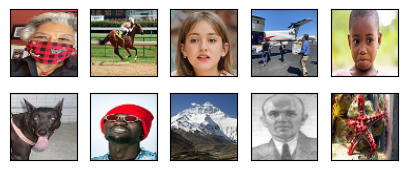

In [14]:
url= 'https://github.com/dknife/ML/raw/main/data/Proj2/test_data/'
test_images =  []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

plot_images(2,5,test_images)

In [15]:
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8,
                              pixels_per_cell=(16,16), cells_per_block=(1,1),
                              visualize=True, multichannel=True)
    test_features.append(hog_desc)

test_result = polynomial_svm_clf.predict(test_features)
test_result

<ipython-input-15-5bbd1f4c174d>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_desc, hog_image = hog(test_images[i], orientations=8,


array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0])

<Figure size 640x480 with 0 Axes>

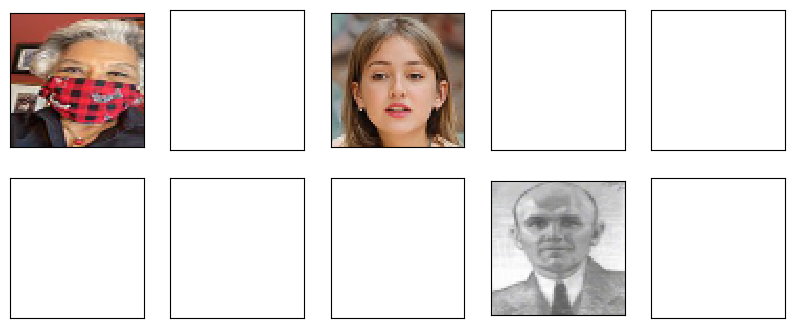

In [16]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize=(10,4))
for i in range(2):
    for j in range(5):
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        if test_result[i*5+j] == 1:
            ax[i,j].imshow(test_images[i*5+j], interpolation='nearest')

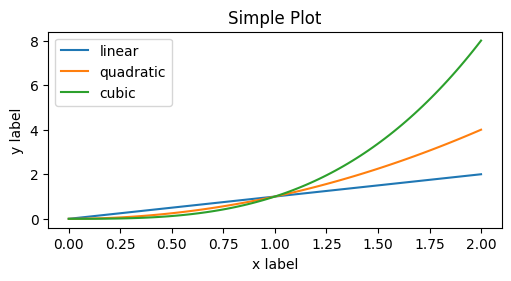

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

##번외

<class 'numpy.ndarray'> (2, 2)
<class 'matplotlib.axes._axes.Axes'>


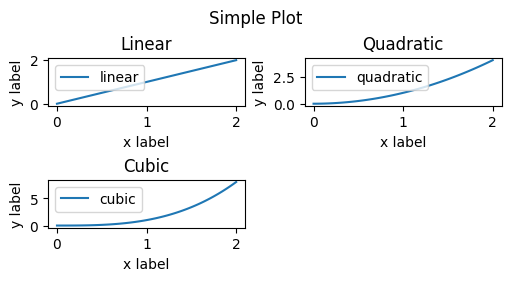

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(2, 2, figsize=(5, 2.7), constrained_layout=True)  # Use constrained_layout instead of layout

print(type(ax), ax.shape) #subplot 축 4개 떨궈줌.
print(type(ax[0,0]))
# Plot on the top-left subplot
ax[0, 0].plot(x, x, label='linear')
ax[0, 0].set_xlabel('x label')
ax[0, 0].set_ylabel('y label')
ax[0, 0].set_title("Linear")

# Plot on the top-right subplot
ax[0, 1].plot(x, x**2, label='quadratic')
ax[0, 1].set_xlabel('x label')
ax[0, 1].set_ylabel('y label')
ax[0, 1].set_title("Quadratic")

# Plot on the bottom-left subplot
ax[1, 0].plot(x, x**3, label='cubic')
ax[1, 0].set_xlabel('x label')
ax[1, 0].set_ylabel('y label')
ax[1, 0].set_title("Cubic")

# Remove the empty subplot on the bottom-right
ax[1, 1].remove()

# Add a legend to all subplots
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()

plt.suptitle("Simple Plot")  # Add a suptitle for the entire figure

plt.show()

#2.붓꽃 분류하기 앙상블 모델

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습용 데이터와 테스트용 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# K-NN 모델
knn = KNeighborsClassifier(n_neighbors=5)

# 로지스틱 회귀 모델
logreg = LogisticRegression()

# 의사결정트리 모델 (gini)
dt_gini = DecisionTreeClassifier(max_depth=4, criterion='gini')

# 의사결정트리 모델 (entropy)
dt_entropy = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# 선형 SVM 모델
svm = LinearSVC()

# 앙상블 모델 (보팅)
voting_clf = VotingClassifier(
    estimators=[('knn', knn), ('logreg', logreg), ('dt_gini', dt_gini),
                ('dt_entropy', dt_entropy), ('svm', svm)],
    voting='hard'
)

# 각 모델의 정확률, 혼동행렬 출력
models = [knn, logreg, dt_gini, dt_entropy, svm, voting_clf]
model_names = ['K-NN', 'Logistic Regression', 'Decision Tree (gini)', 'Decision Tree (entropy)', 'Linear SVM', 'Ensemble']

for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Model: ", model_name)
    print("Accuracy: ", accuracy)
    print("Confusion Matrix: \n", cm)
    print("-------------------------------")

# 앙상블 모델 정확률 출력
voting_clf.fit(X_train, y_train)
y_pred_ensemble = voting_clf.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy:", accuracy_ensemble)


Model:  K-NN
Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
-------------------------------
Model:  Logistic Regression
Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
-------------------------------
Model:  Decision Tree (gini)
Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
-------------------------------
Model:  Decision Tree (entropy)
Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
-------------------------------
Model:  Linear SVM
Accuracy:  0.9555555555555556
Confusion Matrix: 
 [[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
-------------------------------
Model:  Ensemble
Accuracy:  1.0
Confusion Matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
-------------------------------
Ensemble Model Accuracy: 1.0
